
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)
---
# **Face Recognition**

In this lesson, we will implement **simple Face Recognitions using the python library face-recognition**.

1. Install `face-recognition`
2. Check facial similarity
3. Recognize Faces in an image


In [1]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=8cc8affb3b32ea8d131db387d0aafff7c918ff751c0f505cdb5dde64aa3f86ec
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


## **2. Check Facial Similarity between two Faces**

In [2]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden2.jpg

--2023-06-07 07:39:19--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg [following]
--2023-06-07 07:39:19--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13791 (13K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>]  13.47K  --.-KB/s    in 0s      

2023-06-07 07:39:19 (88.2 MB/s) - ‘trump.jpg’ saved [13791/13791]

--2023-06-07 07:39:19--  https://git

In [3]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()

In [4]:
biden = cv2.imread('biden.jpg')
biden2 = cv2.imread('biden2.jpg')
trump = cv2.imread('trump.jpg')

imshow('Trump', trump)
imshow('Biden', biden)
imshow('Biden', biden2)

Output hidden; open in https://colab.research.google.com to view.

### **Now let's try it with the above two images**

In [5]:
known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("trump.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is False


### **Now let's try it with the two Biden images**

In [8]:
known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("biden2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

print(biden_encoding.shape)
print(unknown_encoding.shape)

(128,)
(128,)


In [9]:
result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is True


## **3. Recognize Faces in an image**

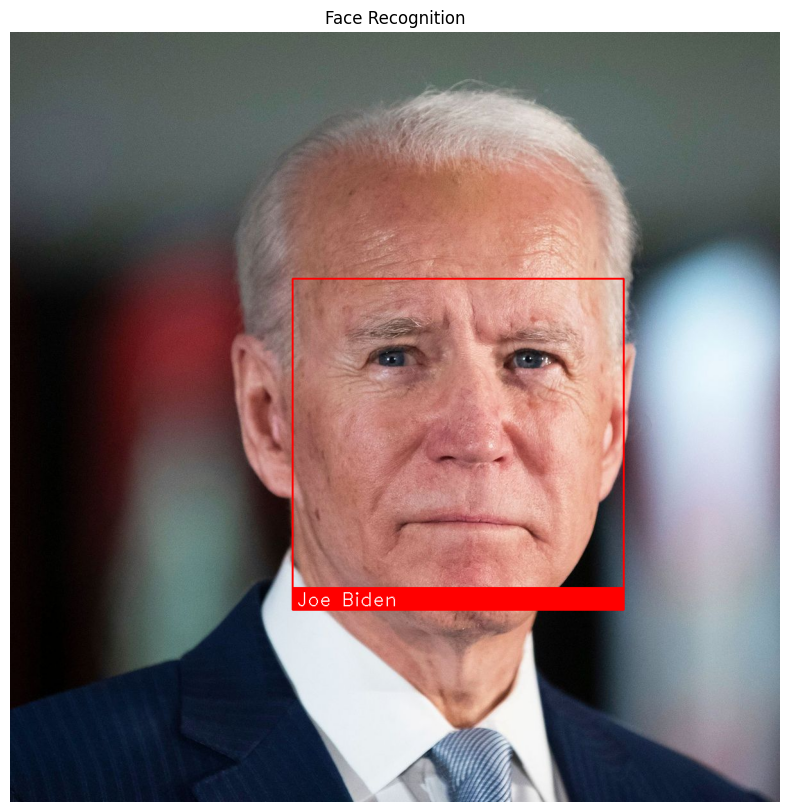

In [13]:
# Load a sample picture and learn how to recognize it.
trump_image = face_recognition.load_image_file("trump.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    trump_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Donald Trump",
    "Joe Biden"
]

face_locations = []
face_encodings = []
face_names = []

image = cv2.imread('biden2.jpg')

# Resize image of video to 1/4 size for faster face recognition processing
small_image = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)

# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb_small_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2RGB)

# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(rgb_small_image)
face_encodings = face_recognition.face_encodings(rgb_small_image, face_locations)

face_names = []
for face_encoding in face_encodings:
  # See if the face is a match for the known face(s)
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown"

  # if a match was found in known_face_encodings, just use the first one.
  if True in matches:
    first_match_index = matches.index(True)
    name = known_face_names[first_match_index]

  # Or instead, use the known face with the smallest distance to the new face
  else:
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
      face_names.append(name)


# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
  # Scale back up face locations since the image we detected in was scaled to 1/4 size
  top *= 4
  right *= 4
  bottom *= 4
  left *= 4

  cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

  cv2.rectangle(image, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
  font = cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
imshow('Face Recognition', image)